
# Logistic Regression with Python

    

## Objectives

After completing this lab you will be able to:

* Use scikit Logistic Regression to classify
* Understand confusion matrix


In this notebook I will create a model for a telecommunication company, to predict when its customers will leave for a competitor, so that they can take some action to retain the customers.


### Customer churn with Logistic Regression
A telecommunications company is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is leaving. Imagine that you are an analyst at this company and you have to find out who is leaving and why.


Let's first import required libraries:


In [8]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

<h2 id="about_dataset">About the dataset</h2>
I will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 

The dataset includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents


###  Load the Telco Churn data 
Telco Churn is a hypothetical data file that concerns a telecommunications company's efforts to reduce turnover in its customer base. Each case corresponds to a separate customer and it records various demographic and service usage information.


## Load Data From CSV File  


In [25]:
churn_df = pd.read_csv(r"C:\Users\HP\Pictures\Github Projects\WA_Fn-UseC_-Telco-Customer-Churn.csv")
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<h2 id="preprocessing">Data pre-processing and selection</h2>


Let's select some features for the modeling. Also, we change the target data type to be an integer.


In [27]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [38]:
# Convert 'TotalCharges' to numeric, replacing errors with NaN
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'], errors='coerce')

# Handle missing values in 'TotalCharges' (e.g., replacing with the median)
churn_df['TotalCharges'].fillna(churn_df['TotalCharges'].median(), inplace=True)

# Convert 'Churn' column to integers: "Yes" -> 1, "No" -> 0
churn_df['Churn'] = churn_df['Churn'].map({'Yes': 1, 'No': 0})

# Select features for modeling
features = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
    'MonthlyCharges', 'TotalCharges'
]

# Encode categorical features
churn_df = pd.get_dummies(churn_df[features + ['Churn']], drop_first=True)

# Check the updated dataframe
print(churn_df.head())

C:\Users\HP\AppData\Local\Temp\ipykernel_10412\1202959084.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  churn_df['TotalCharges'].fillna(churn_df['TotalCharges'].median(), inplace=True)


   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Male  \
0              0       1           29.85         29.85      0        False   
1              0      34           56.95       1889.50      0         True   
2              0       2           53.85        108.15      1         True   
3              0      45           42.30       1840.75      0         True   
4              0       2           70.70        151.65      1        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone service  ...  StreamingTV_No internet service  \
0                            True  ...                            False   
1                           False  ...                            Fa

In [41]:
churn_df.shape

(7043, 31)

In [43]:
churn_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


Let's define X, and y for our dataset:


In [47]:
print(churn_df['SeniorCitizen'])

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: int64


In [49]:
X = np.asarray(churn_df[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']])
X[0:5]

array([[0.00000e+00, 1.00000e+00, 2.98500e+01, 2.98500e+01],
       [0.00000e+00, 3.40000e+01, 5.69500e+01, 1.88950e+03],
       [0.00000e+00, 2.00000e+00, 5.38500e+01, 1.08150e+02],
       [0.00000e+00, 4.50000e+01, 4.23000e+01, 1.84075e+03],
       [0.00000e+00, 2.00000e+00, 7.07000e+01, 1.51650e+02]])

In [53]:
y = np.asarray(churn_df['Churn'])
y [0:5]

array([0, 0, 1, 0, 1], dtype=int64)

Also, we normalize the dataset:


In [55]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.43991649, -1.27744458, -1.16032292, -0.99424194],
       [-0.43991649,  0.06632742, -0.25962894, -0.17324413],
       [-0.43991649, -1.23672422, -0.36266036, -0.95967407],
       [-0.43991649,  0.51425142, -0.74653546, -0.19476626],
       [-0.43991649, -1.23672422,  0.19736523, -0.9404697 ]])

## Train/Test dataset


We split our dataset into train and test set:


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5634, 4) (5634,)
Test set: (1409, 4) (1409,)


<h2 id="modeling">Modeling (Logistic Regression with Scikit-learn)</h2>


Let's build our model using __LogisticRegression__ from the Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in the internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem of machine learning models.
__C__ parameter indicates __inverse of regularization strength__ which must be a positive float. Smaller values specify stronger regularization. 
Now let's fit our model with train set:


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

Now we can predict using our test set:


In [62]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

__predict_proba__  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):


In [64]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.67883183, 0.32116817],
       [0.88370417, 0.11629583],
       [0.81782183, 0.18217817],
       ...,
       [0.91116372, 0.08883628],
       [0.9142254 , 0.0857746 ],
       [0.87537815, 0.12462185]])

<h2 id="evaluation">Evaluation</h2>


### jaccard index
Let's try the jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of the two label sets. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.



In [66]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.753391859537111

### confusion matrix
Another way of looking at the accuracy of the classifier is to look at __confusion matrix__.


Confusion Matrix (Before Normalization):
[[944  91]
 [218 156]]
Normalized Confusion Matrix:
[[0.91 0.09]
 [0.58 0.42]]


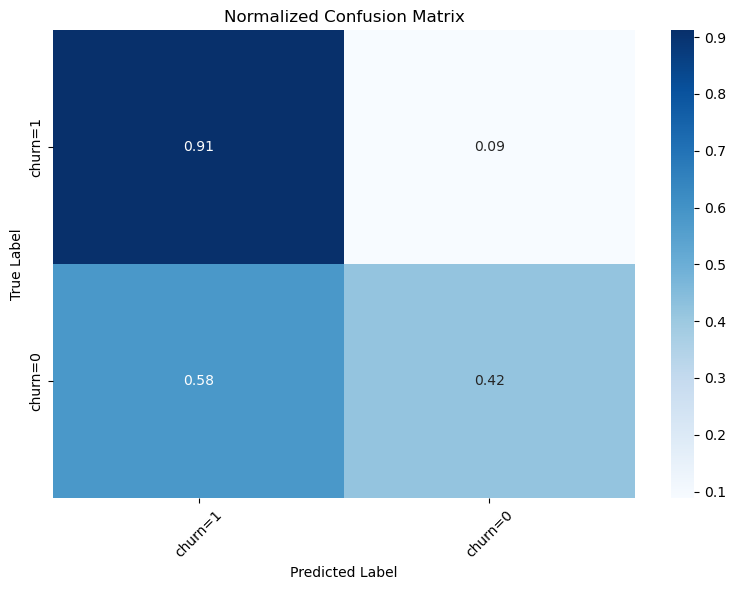

In [84]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix_alt(y_test, yhat, classes, normalize=False, title='Confusion Matrix'):
    """
    This function uses seaborn to plot a confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cm = confusion_matrix(y_test, yhat)
    
    print("Confusion Matrix (Before Normalization):")
    print(cm)  # Print confusion matrix for inspection
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix:")
    else:
        print('Confusion matrix, without normalization')

    print(cm)  # Print the normalized or non-normalized matrix

    # Plotting confusion matrix using seaborn's heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt=".2f" if normalize else "d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Class names for your dataset (replace these with your actual class labels)
class_names = ['churn=1','churn=0']  # Modify if you have more classes

# Plot confusion matrix
plot_confusion_matrix_alt(y_test, yhat, classes=class_names, normalize=True, title='Normalized Confusion Matrix')

Confusion matrix, without normalization
[[156 218]
 [ 91 944]]


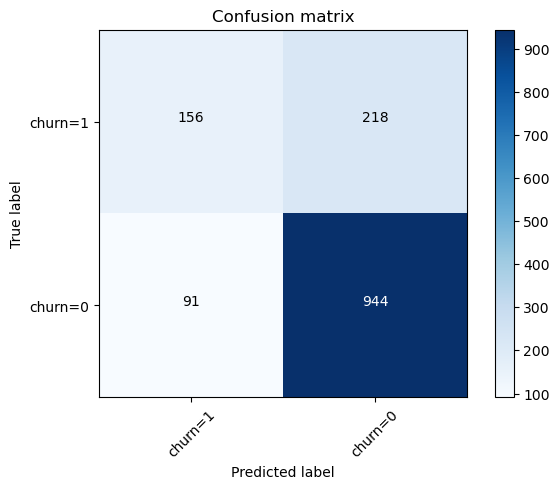

In [76]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

Let's look at first row. The first row is for customers whose actual churn value in the test set is 1.
As you can calculate, out of 40 customers, the churn value of 15 of them is 1. 
Out of these 15 cases, the classifier correctly predicted 6 of them as 1, and 9 of them as 0. 

This means, for 6 customers, the actual churn value was 1 in test set and classifier also correctly predicted those as 1. However, while the actual label of 9 customers was 1, the classifier predicted those as 0, which is not very good. We can consider it as the error of the model for first row.

What about the customers with churn value 0? Lets look at the second row.
It looks like  there were 25 customers whom their churn value were 0. 


The classifier correctly predicted 24 of them as 0, and one of them wrongly as 1. So, it has done a good job in predicting the customers with churn value 0. A good thing about the confusion matrix is that it shows the model’s ability to correctly predict or separate the classes.  In a specific case of the binary classifier, such as this example,  we can interpret these numbers as the count of true positives, false positives, true negatives, and false negatives. 


In [86]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1035
           1       0.63      0.42      0.50       374

    accuracy                           0.78      1409
   macro avg       0.72      0.66      0.68      1409
weighted avg       0.76      0.78      0.76      1409



we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.76 in our case.

### log loss
Now, let's try __log loss__ for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1.
Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1. 


In [89]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.4710199375805409